In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [76]:
#GET FILENAME AS INPUT

name = input("Enter file name")
#name = "/Users/swarnav/Desktop/h2o.log"

f = open(name)

times = []
timesIter = []
times_map = []
CPU = []
CPUmemory = []
errors = {}
files = []
total = []
count = 0

#PARSE THROUGH THE FILE TO GET VALUES

for line in f:
    if "Starting Iteration:" in line:
        count = int(line.split("Starting Iteration:")[1])
        iter_date = line.split()[0] + " " + line.split()[1]                      #Storing iteration timestamp
        iter_time = datetime.datetime.strptime(iter_date, '%Y-%m-%d %H:%M:%S,%f')
        times_map.append(iter_time)
    if "Ping from experiment" in line:                                           #Getting pings from experiment
        words = line.split()
        str_date = words[0] + " " + words[1]
        date_time = datetime.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S,%f')
        if len(times_map) > 0 and date_time > times_map[0]:
            times.append(date_time)
            timesIter.append(count)
            for i,w in enumerate(words):         
                if w == "OpenFiles:":                                   #fetching Openfiles count and storing in array
                    temp = words[i+1].split('/')
                    files.append(int(temp[0]))
                    if temp[1] != '':
                        total.append(int(temp[1]))
                    else:
                        total.append(int(words[i+2]))
                if w == "CPU" and words[i+1] == "memory":   #Getting CPU memeory usage and converting all values to GB 
                    if "GB" in words[i+3]:
                        value = float(words[i+3].split("GB")[0])
                    elif "MB" in words[i+3]:
                        value = float(words[i+3].split("MB")[0])/1000.0
                    elif "TB" in words[i+3]:
                        value = float(words[i+3].split("TB")[0])*1000.0
                    CPUmemory.append(value)
               # print("CPU memory usage: "+words[1] + " " + words[i+3])
                if w == "CPU:" and words[i+1] != 'User:':
                    CPU.append(int(words[i+1].split('%')[0]))
               # print("CPU: "+words[1] + " " + words[i+1])
    if "ERROR" in line:                                                     #Fetching errors and counting frequency
        error = line.split("ERROR  :")
       # print("ERROR: "+error[0].split()[1]+error[1])
        err = error[1]
        if "Uncaught" in err:
            err = ' '.join(err.split()[:3])
        if err not in errors:
            errors[err] = 1
        else:
            errors[err] += 1
err = []
errcount = []
for k,v in errors.items():
    err.append(k)
    errcount.append(v)

        


Enter file name/Users/swarnav/Desktop/h2o.log


In [77]:
#Adding log data arrays to Data frame

log_data = pd.concat([pd.DataFrame(times),pd.DataFrame(CPU)
           ,pd.DataFrame(CPUmemory),pd.DataFrame(files),pd.DataFrame(total),pd.DataFrame(timesIter)],axis=1)

In [78]:
#Setting colum names for Dataframe columns

log_data.columns = ['time_stamp','cpu_utilization','cpu_memory','open_files','total_files','iteration']

In [79]:
log_data.isna().sum()

time_stamp         0
cpu_utilization    0
cpu_memory         0
open_files         0
total_files        0
iteration          0
dtype: int64

In [80]:
len(log_data)

1421

In [63]:
log_data['row_number'] = np.arange(len(log_data))

In [64]:
#printing contents of dataframe

log_data

,time_stamp,cpu_utilization,cpu_memory,open_files,total_files,iteration,row_number
0,2018-11-09 22:40:57.980,119,897.4,991,2048,0,0
1,2018-11-09 22:41:14.658,3978,897.4,991,10240,0,1
2,2018-11-09 22:41:32.197,2223,890.6,5092,10240,0,2
3,2018-11-09 22:41:33.775,2223,890.6,5092,6144,0,3
4,2018-11-09 22:41:47.469,189,889.6,5092,6144,0,4
5,2018-11-09 22:41:56.536,189,889.6,3374,6144,0,5
6,2018-11-09 22:42:05.020,169,890.6,3374,6144,0,6
7,2018-11-09 22:42:06.064,169,890.6,3374,6144,0,7
8,2018-11-09 22:42:25.922,149,890.9,3374,6144,0,8
9,2018-11-09 22:42:26.965,149,890.9,3374,6144,0,9


In [65]:
log_data_required = log_data[log_data['row_number']%25 == 0]

In [66]:
len(log_data_required)

57

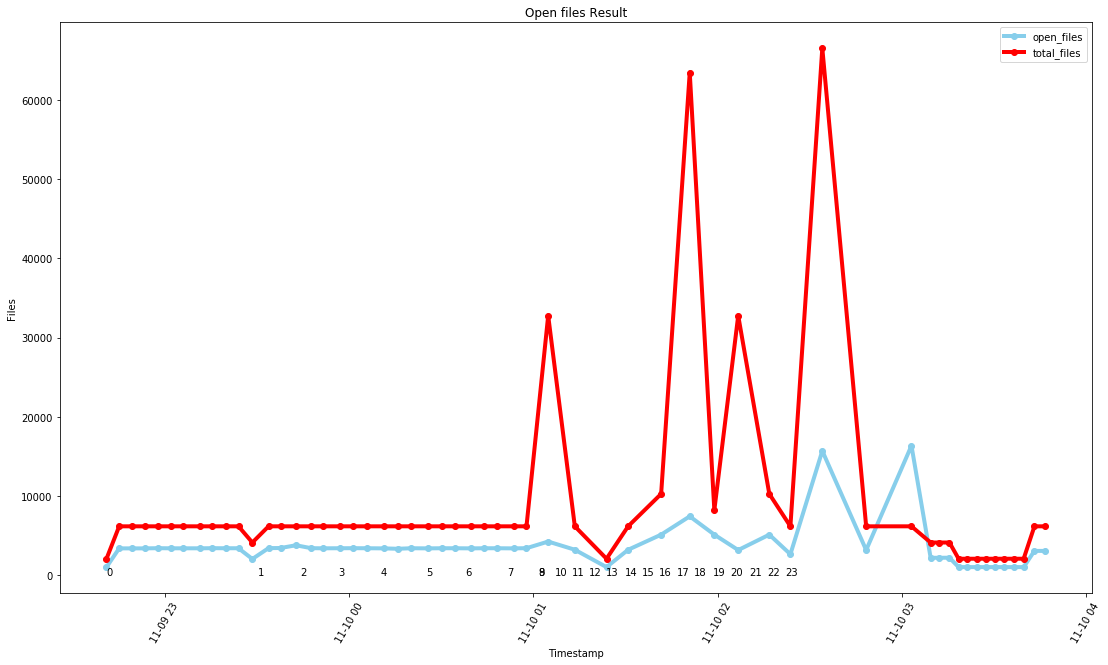

In [67]:
#Plotting timestamp vs openfiles and total files count. 
#The numbers in graph are annotations for start of each iteration

plt.plot( 'time_stamp', 'open_files', data=log_data_required, color='skyblue', marker='o', linewidth=4)
plt.plot( 'time_stamp', 'total_files', data=log_data_required, color='red', marker='o', linewidth=4)
plt.xticks(rotation=60)
plt.legend()
plt.ylabel('Files')
plt.xlabel('Timestamp')
plt.title('Open files Result')

count = 0

for val in times_map:
    plt.annotate(count,
            xy=(val, 10)) 
    count = count + 1
    
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('openfiles.png', dpi=100)

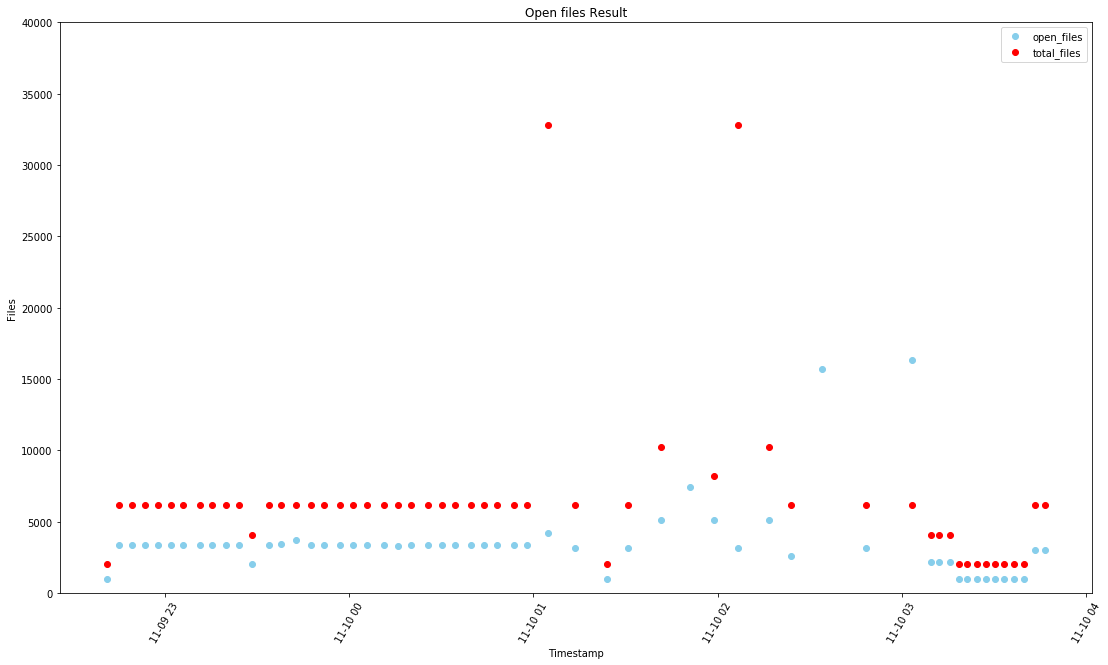

In [68]:
#Plotting timestamp vs openfiles and total files count using scatter plot zooming in values. 

plt.plot( 'time_stamp', 'open_files', data=log_data_required, linestyle='', color='skyblue', marker='o', linewidth=4)
plt.plot( 'time_stamp', 'total_files', data=log_data_required, linestyle='', color='red', marker='o', linewidth=4)
plt.ylim(0, 40000)
plt.legend()

plt.ylabel('Files')
plt.xlabel('Timestamp')
plt.title('Open files Result')

plt.xticks(rotation=60)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('openfiles2.png', dpi=100)

In [69]:
log_data_required.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 1400
Data columns (total 7 columns):
time_stamp         57 non-null datetime64[ns]
cpu_utilization    57 non-null int64
cpu_memory         57 non-null float64
open_files         57 non-null int64
total_files        57 non-null int64
iteration          57 non-null int64
row_number         57 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 3.6 KB


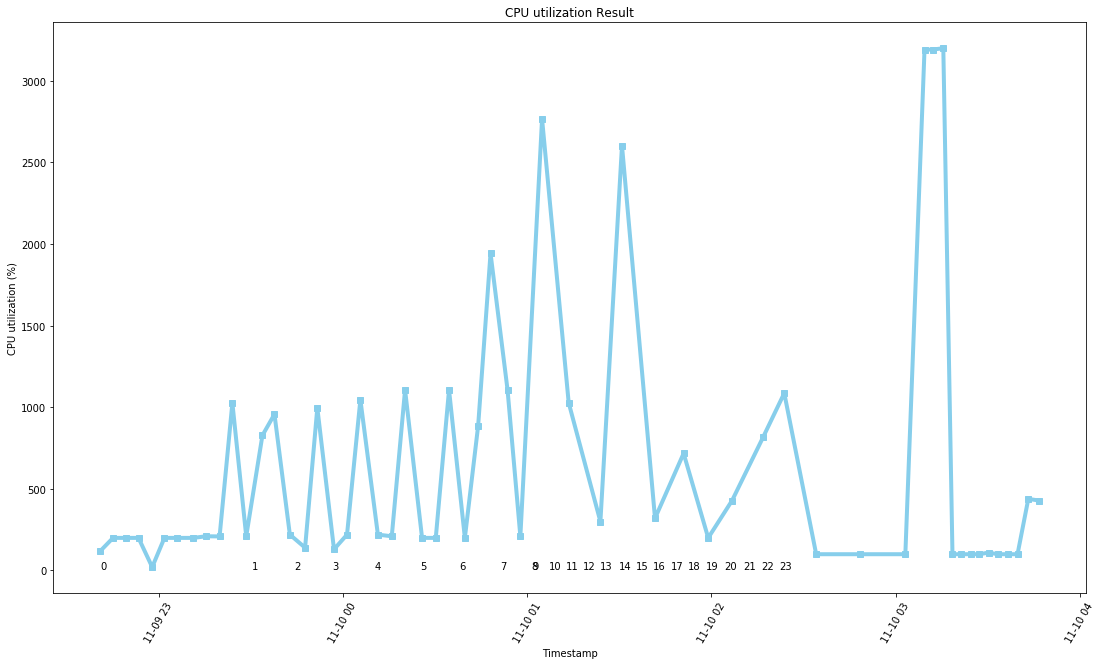

In [70]:
#Plotting timestamp vs cpu utilization(in percentage) 
#The numbers in graph are annotations for start of each iteration

plt.plot( 'time_stamp', 'cpu_utilization', data=log_data_required, color='skyblue', marker='s', linewidth=4)
plt.xticks(rotation=60)

plt.ylabel('CPU utilization (%)')
plt.xlabel('Timestamp')
plt.title('CPU utilization Result')

count = 0

for val in times_map:
    plt.annotate(count,
            xy=(val, 10)) 
    count = count + 1

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('cpuutil.png', dpi=100)

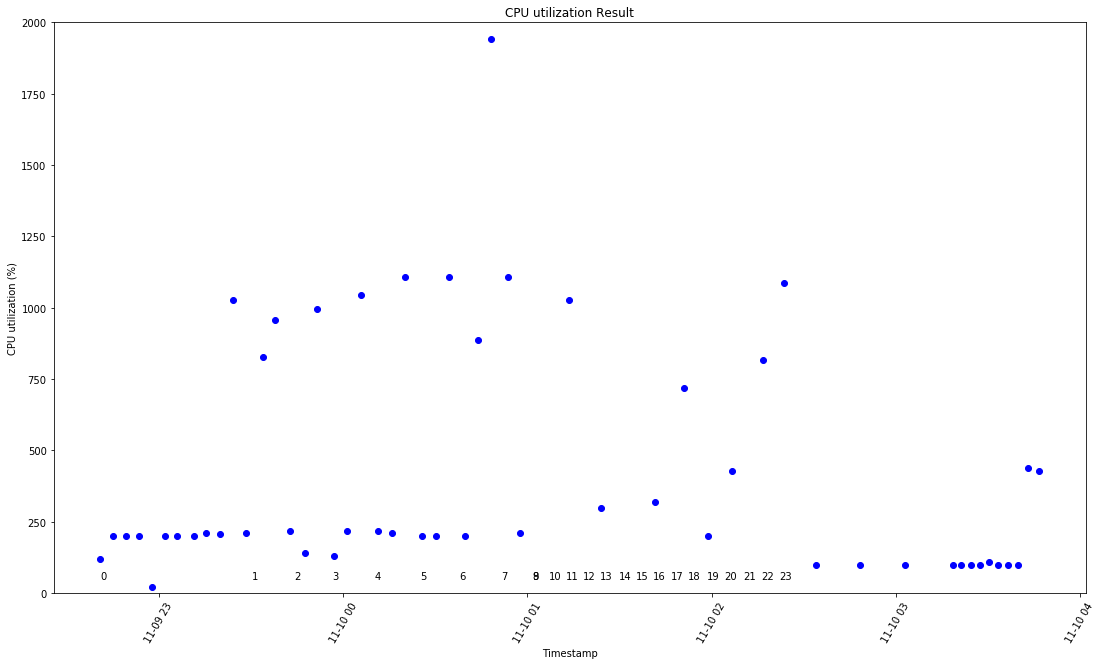

In [71]:
plt.plot( 'time_stamp', 'cpu_utilization', data=log_data_required, linestyle='', color='blue', marker='o', linewidth=4)
plt.xticks(rotation=60)
plt.ylim(0, 2000)

plt.ylabel('CPU utilization (%)')
plt.xlabel('Timestamp')
plt.title('CPU utilization Result')

count = 0

for val in times_map:
    plt.annotate(count,
            xy=(val, 50)) 
    count = count + 1

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('cpuutil2.png', dpi=100)


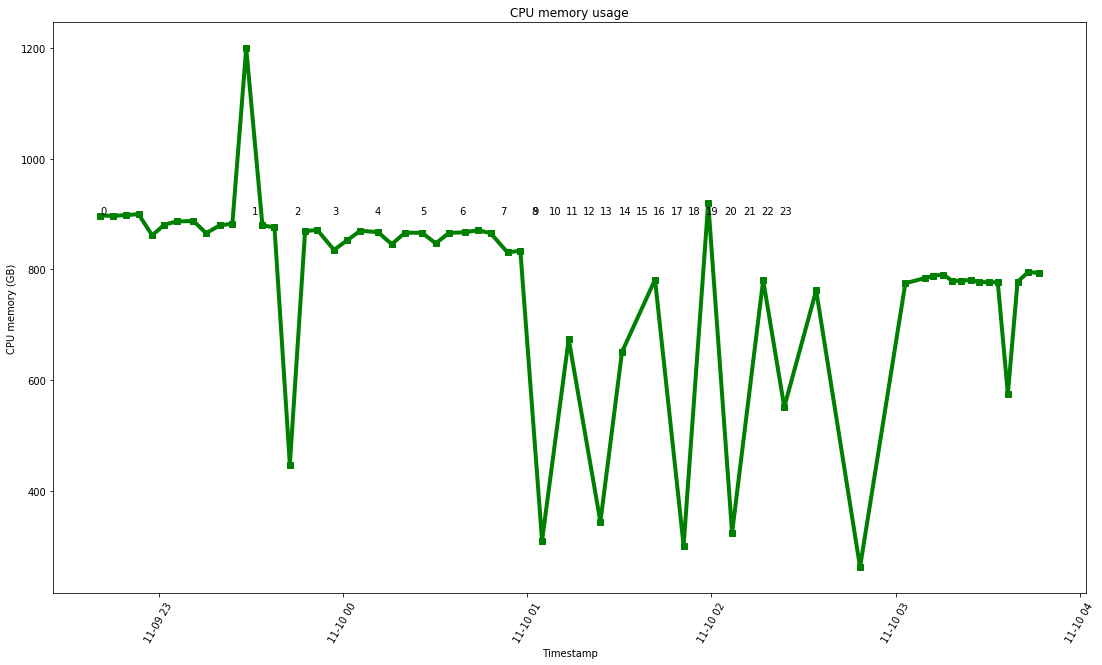

In [72]:
#Plotting timestamp vs cpu memory usage(in GB). 
#The numbers in graph are annotations for start of each iteration

plt.plot( 'time_stamp', 'cpu_memory', data=log_data_required, color='green', marker='s', linewidth=4)
plt.xticks(rotation=60)

plt.ylabel('CPU memory (GB)')
plt.xlabel('Timestamp')
plt.title('CPU memory usage')

count = 0

for val in times_map:
    plt.annotate(count,
            xy=(val, 900)) 
    count = count + 1

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('cpumemory.png', dpi=100)


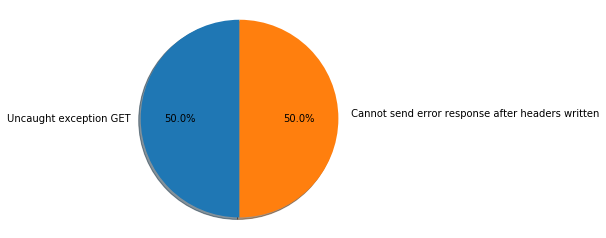

<Figure size 720x576 with 0 Axes>

In [73]:
#Pie chart showing errors and their frequency 

labels = err
sizes = errcount
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.savefig('error.png', dpi=100)


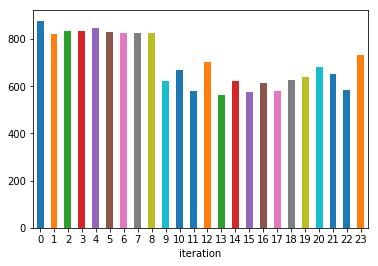

In [74]:
#Bar chart showing mean cpu memory usage for each iteration

df1 = log_data.groupby('iteration').agg({'cpu_memory':'mean'})

#Bar chart showing mean cpu memory usage for each iterationdf1.unstack()['cpu_memory'].plot.bar(rot=0)

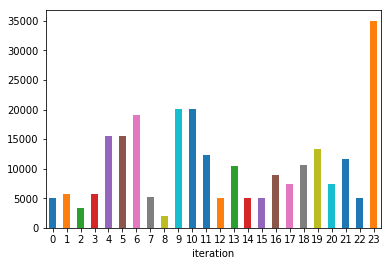

In [75]:
#Bar chart showing maximum number of open files for each iteration

df1 = log_data.groupby('iteration').agg({'open_files':'max'})

df1.unstack()['open_files'].plot.bar(rot=0)